Some of the contents of this notebook were prepared by Dr. Edward Raff (Spring 2019), and some content were borrowed from https://github.com/dashee87/blogScripts/blob/master/Jupyter/2017-05-09-Clustering-with-Scikit-with-GIFs.ipynb

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score, completeness_score, homogeneity_score
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph

# Homework #5
- Download the Mall Customer Segmentation Data from our github repo.
- Use only 3 features (Age, Income and Spending Score) and run k-means algorithm. Determine/choose the optimum "k" value using the elbow method. Show your plot (error vs. k)
- Again with the same 3 features, scatter your data in a 3D plot. Coloring of samples should denote the determined categories (your optimum k). I.e. we should be able to distinguish the samples of k categories. 

## Q1

In [ ]:
#Loading the Mall Customer Segmentation Data from our github repo to

import pandas as pd
!git clone https://github.com/UMBC-Data-Science/DATA602Datasets.git
df = pd.read_csv("./DATA602Datasets/Mall_Customers.csv")
df.head(3)

fatal: destination path 'DATA602Datasets' already exists and is not an empty directory.


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


## Q2

   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40 



Text(0.5, 1.0, 'Error Vs K')

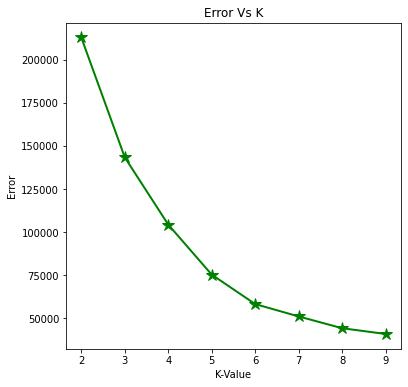

In [ ]:
#using only 3 features to find the optimum K value

df.drop(['CustomerID','Gender'], axis=1, inplace= True)
print(df.head(5),"\n")

score = []

for k in range(2, 10):
  Kmeans = KMeans(n_clusters=k)
  Kmeans.fit(df)
  score.append( -Kmeans.score(df) )
  
plt.figure(figsize=(6, 6))
plt.subplot(111)
plt.plot([k for k in range(2,10)], score,linewidth=2, markersize=12, marker='*',color = 'green')
plt.xlabel('K-Value')
plt.ylabel('Error')
plt.title('Error Vs K')

## From the above elbow graph it is evident that the ***K = 5*** is the optimum K value, after which their is not much improvement in the error with an increase in ***K***.

## Q3

predicted clusters are 
 [0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 1 2 1 4 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 4 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]

 count of data point in each clusters: 

cluster 0 23
cluster 1 39
cluster 2 36
cluster 3 23
cluster 4 79


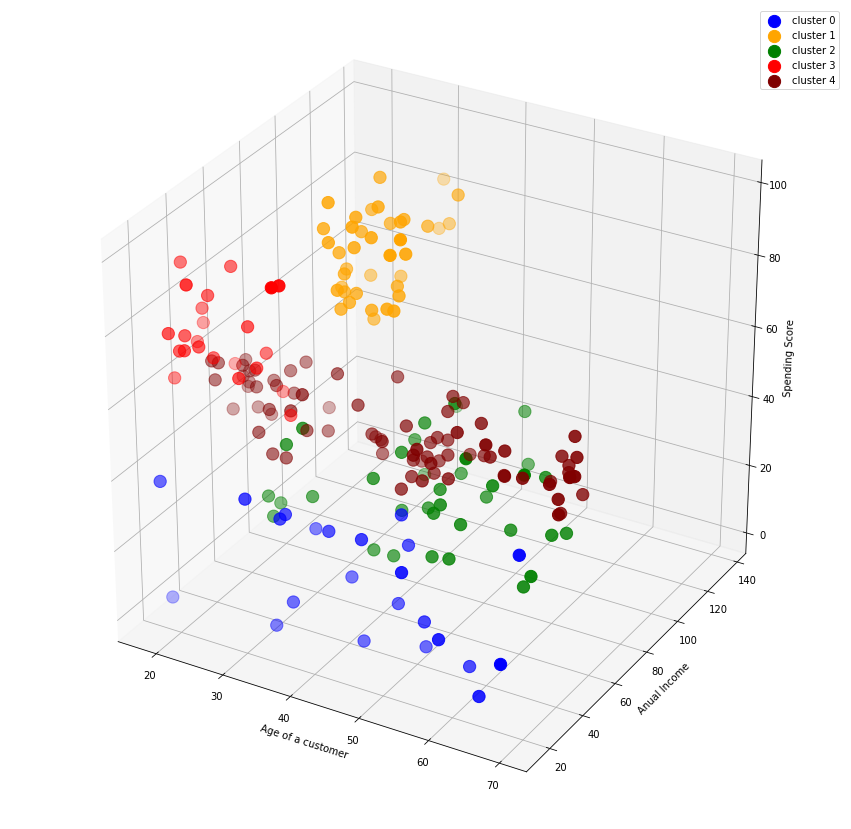

In [ ]:
# 3D-Scatter plot of the data with optimum K value.

n_clusters=5

x = df[['Age','Annual Income (k$)','Spending Score (1-100)']].values
y_clusters = KMeans(n_clusters=n_clusters).fit_predict(x)     #clusters prediction using Kmeans
print("predicted clusters are","\n",y_clusters)      

(uniq, freq) = (np.unique(y_clusters, return_counts=True))   #calculating number od data points in each cluster using unique

print("\n","count of data point in each clusters:",'\n')
for i in range(len(uniq)):
  print("cluster "+str(uniq[i])+" "+str(freq[i]))



fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')       #3D-plot
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 150 , color = 'blue', label = "cluster 0")   #scatter plot with X,Y,Z axes
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 150 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 150 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 150 , color = 'red', label = "cluster 3")
ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 150 , color = 'maroon', label = "cluster 4")

ax.set_xlabel('Age of a customer')
ax.set_ylabel('Anual Income')
ax.set_zlabel('Spending Score')
ax.legend()

plt.show()